In [22]:
from bmc.simulate import simulate

BMCTool simulation: 100%|██████████| 328/328 [00:00<00:00, 16195.75it/s]


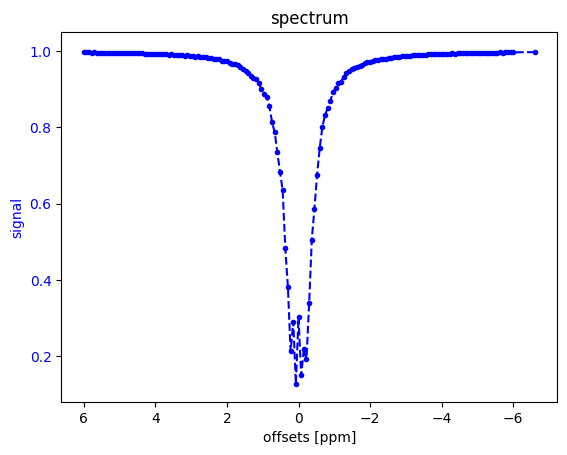

In [23]:
seq_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/default_seqid.seq'
config_path = '/Users/danielmiksch/JupyterLab/optim/seq_init/config_1pool.yaml'

seq_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/default_seqid.seq'
config_path_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/config_1pool.yaml'


simulate(config_file=config_path, seq_file=seq_path, show_plot=True)
# simulate(config_file=config_path_win, seq_file=seq_path_win, show_plot=True)  # simulation windows

In [24]:
from bmc.simulate import simulate_fid

BMCTool simulation: 100%|██████████| 2/2 [00:00<00:00, 44.43it/s]


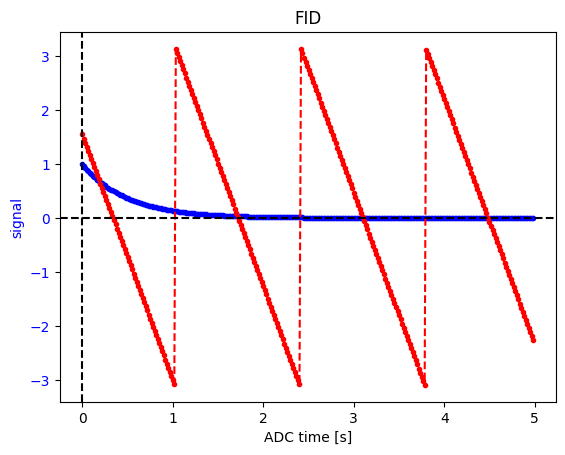

In [25]:
seq_path_gauss = '/Users/danielmiksch/JupyterLab/optim/seq_init/simple_gauss.seq'
seq_path_gauss_win = 'C:/Users/s436276/simulation/JupyterLab/optim/seq_init/simple_gauss.seq'

sim = simulate_fid(config_file=config_path, seq_file=seq_path_gauss, adc_time=5, show_plot=True)
# sim = simulate_fid(config_file=config_path_win, seq_file=seq_path_gauss_win, adc_time=.5, show_plot=True)  # simulation windows

In [26]:
import numpy as np
magz = sim.get_mag(return_zmag=True)[1][:20]
t = np.linspace(0, 5, len(magz))
magz

array([0.00363984, 0.00934963, 0.01502669, 0.02067122, 0.02628341,
       0.03186343, 0.03741147, 0.04292772, 0.04841236, 0.05386557,
       0.05928753, 0.06467842, 0.07003841, 0.07536769, 0.08066643,
       0.0859348 , 0.09117299, 0.09638115, 0.10155947, 0.10670811])

In [27]:
sim.animate(run_time=.1, track_path=True, ie=False, **{'quality': '-ql', 'write': '--write_to_movie'}) #--write_to_movie

Manim Community v0.18.1

In [28]:
import numpy
print(numpy.__version__)
print(numpy.__file__)

1.26.4
/Users/danielmiksch/miniconda3/envs/src/lib/python3.11/site-packages/numpy/__init__.py
